<a href="https://colab.research.google.com/github/Yuvraj-Jaiswal/Deep-learning-Super-Resolution/blob/main/Deep_leaning_super_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

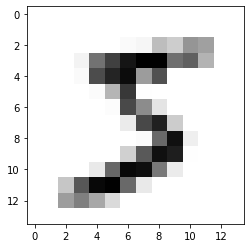

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,LeakyReLU,Reshape,BatchNormalization
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

Low_res_size = 14

(train_images , _) , (test_images , _) = mnist.load_data()

Low_res_images = []
for img in train_images:
  frame = cv2.resize(img,(Low_res_size,Low_res_size))
  Low_res_images.append(frame)

Low_res_images = np.array(Low_res_images)


Low_res_images_test = []
for img in test_images:
  frame = cv2.resize(img,(14,14))
  Low_res_images_test.append(frame)

Low_res_images_test = np.array(Low_res_images_test)

plt.imshow(Low_res_images[0],cmap='binary')

In [ ]:
from tensorflow.python.data.ops.dataset_ops import Dataset
from tensorflow.keras.optimizers import Adam

(train_images , _ ) , (_,_) = mnist.load_data()

train_images = train_images.reshape(60000,28,28,1)
Low_res_images = Low_res_images.reshape(60000,Low_res_size,Low_res_size,1)

train_images = train_images/255
Low_res_images = Low_res_images/255

test_images = test_images.reshape(10000,28,28,1)
Low_res_images_test = Low_res_images_test.reshape(10000,Low_res_size,Low_res_size,1)

test_images = test_images/255
Low_res_images_test = Low_res_images_test/255


Detector = Sequential()
Detector.add(Conv2D(64, (3,3), strides=(1, 1), padding='same' , input_shape=(Low_res_size,Low_res_size,1), activation='relu'))

Detector.add(Conv2D(128, (3,3) , strides=(1, 1) ,padding='same', activation='relu'))

Detector.add(Conv2D(256, (3,3) , strides=(1, 1) ,padding='same', activation='relu'))

Detector.add(Conv2DTranspose(128, (3,3), strides=(1, 1) , padding='same' , activation='relu'))

Detector.add(Conv2DTranspose(64, (3,3), strides=(1, 1) , padding='same' , activation='relu'))

Detector.add(Conv2DTranspose(32, (3,3), strides=(1, 1) , padding='same' , activation='relu'))

Detector.add(Conv2DTranspose(1, (3,3), strides=(2, 2) , padding='same' , activation='relu'))

Detector.compile(loss='mse' ,optimizer='adam')

Detector.fit(Low_res_images,train_images,epochs=20,validation_data=(Low_res_images_test,test_images))

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 9.9555e-04 - val_loss: 9.8983e-04
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 9.7124e-04 - val_loss: 9.7050e-04
Epoch 8/20
1875/1875 [==============================] - 14s 8ms/step - loss: 9.5377e-04 - val_loss: 9.8117e-04
Epoch 9/20
1875/1875 [==============================] - 14s 7ms/step - loss: 9.3553e-04 - val_loss: 9.6426e-04
Epoch 10/20
1875/1875 [==================


Low resolution images



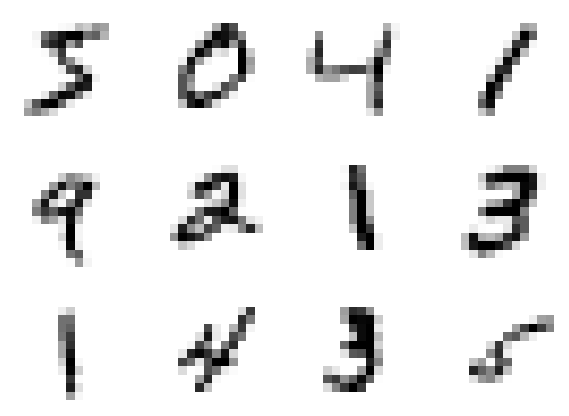


High resolution Generated images



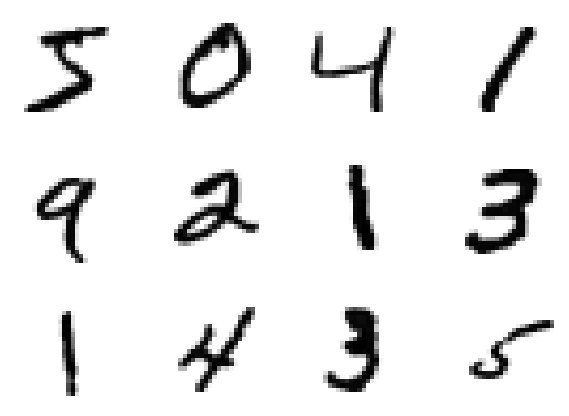


High resolution Real images



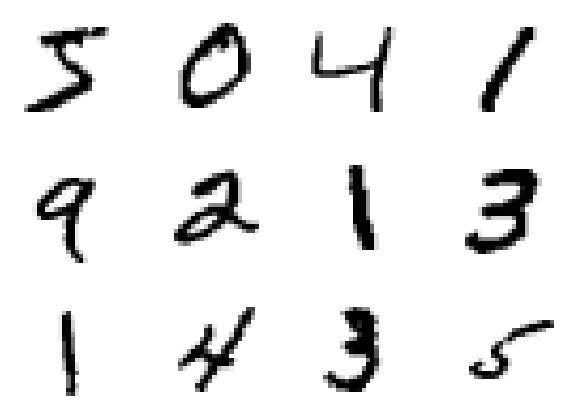

In [ ]:
Generated_Image_Sample = Detector.predict(Low_res_images[0:12])

print("")
print("Low resolution images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(Low_res_images[i].reshape(Low_res_size,Low_res_size),cmap="binary")
  plt.axis('off')
plt.show()

print("")
print("High resolution Generated images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(Generated_Image_Sample[i].reshape(28,28),cmap="binary")
  plt.axis('off')
plt.show()

print("")
print("High resolution Real images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(train_images[i].reshape(28,28),cmap="binary")
  plt.axis('off')
plt.show()


Low resolution images



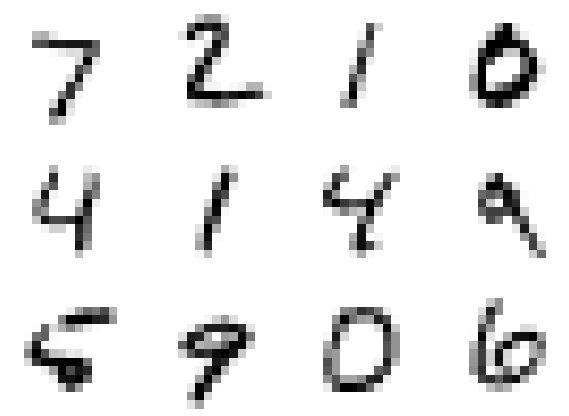


High resolution Generated images



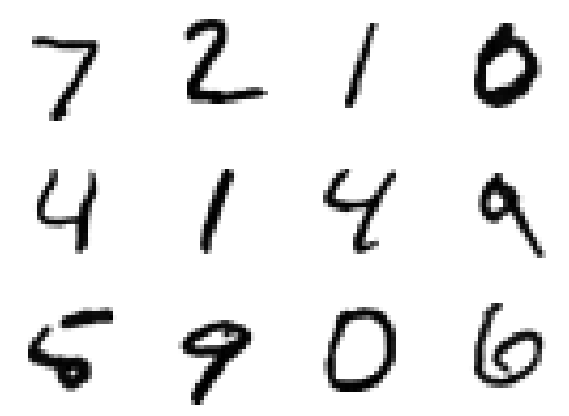


High resolution Real images



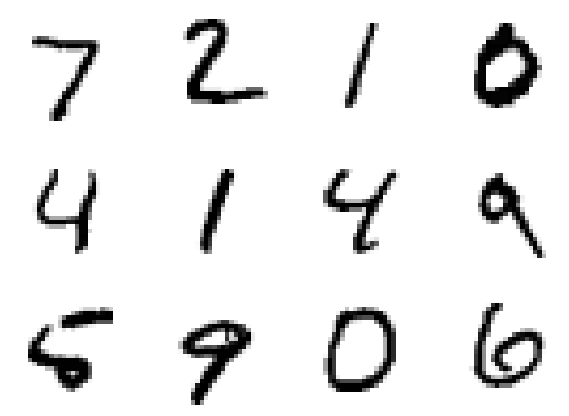

In [ ]:

Generated_Image_Sample = Detector.predict(Low_res_images_test[0:12])

print("")
print("Low resolution images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(Low_res_images_test[i].reshape(Low_res_size,Low_res_size),cmap="binary")
  plt.axis('off')
plt.show()

print("")
print("High resolution Generated images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(Generated_Image_Sample[i].reshape(28,28),cmap="binary")
  plt.axis('off')
plt.show()

print("")
print("High resolution Real images")
print("")

plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.imshow(test_images[i].reshape(28,28),cmap="binary")
  plt.axis('off')
plt.show()